Predict whether a Stackoverflow question will be acceptably answered. Using this public dataset of questions, create a machine learning dataset that you can use for classification.

What is a reasonable benchmark for this problem? What features might be useful?

If you got the above easily, try this harder problem: you want to predict whether a question will be acceptably answered within 2 days. How would you create the dataset?

https://bigquery.cloud.google.com/table/bigquery-public-data:stackoverflow.posts_questions?pli=1&tab=schema

bigquery-public-data:stackoverflow.posts_questions

In [1]:
import google.datalab.bigquery as bq
import pandas as pd
import numpy as np
import seaborn as sns
import shutil

## Extract sample data from BigQuery
All features in bigquery-public-data:stackoverflow.posts_questions:

id	title	body	accepted_answer_id	answer_count	comment_count	community_owned_date	creation_date	favorite_count	last_activity_date	last_edit_date	last_editor_display_name	last_editor_user_id	owner_display_name	owner_user_id	post_type_id	score	tags	view_count	



Features to be extracted using SQL:

id,	accepted_answer_id,	answer_count,	comment_count, creation_date, favorite_count, last_activity_date, score, view_count	


### Adding column to know the DateDifference for accepted answers

Use TIMESTAMP_DIFF(timestamp_1, timestamp_2, MINUTE)

In [2]:
rawdata = """
SELECT 
    id, accepted_answer_id, answer_count, comment_count, creation_date, favorite_count, last_activity_date,  score, view_count,
    TIMESTAMP_DIFF(last_activity_date, creation_date, DAY) as days_posted,
    IF(accepted_answer_id IS NULL , 0, 1) as accepted,
    (IF(answer_count IS NULL , 0, answer_count*2) 
    + IF(comment_count IS NULL , 0, comment_count)  
    + IF(favorite_count IS NULL , 0, favorite_count)  
    + IF(score IS NULL , 0, score)  
    + IF(view_count IS NULL , 0, view_count*2) ) 
    as total_score
FROM 
    `bigquery-public-data.stackoverflow.posts_questions`
WHERE
    MOD(ABS(FARM_FINGERPRINT(CAST(id as STRING))), 1000) = 1
"""
result = bq.Query(rawdata).execute().result().to_dataframe()
print("Total {} questions in StackOverflow Sample Dataset. ".format(len(result)))
result[:10]

Total 17226 questions in StackOverflow Sample Dataset. 


,id,accepted_answer_id,answer_count,comment_count,creation_date,favorite_count,last_activity_date,score,view_count,days_posted,accepted,total_score
0,5406037,5406289.0,9,21,2011-03-23 13:35:35.177,24.0,2012-02-07 20:04:44.827,58,7647,321,1,15415
1,3862449,3862490.0,7,0,2010-10-05 09:41:05.343,1.0,2010-10-05 13:25:29.877,4,2768,0,1,5555
2,48220929,48221155.0,7,1,2018-01-12 06:45:43.957,NaN,2018-01-12 07:26:02.493,4,57,0,1,133
3,3492676,NaN,10,5,2010-08-16 11:30:09.957,3.0,2011-09-16 12:58:54.023,17,27632,396,0,55309
4,15410265,15410637.0,8,4,2013-03-14 13:11:53.087,79.0,2019-02-25 08:59:55.633,135,278225,2173,1,556684
5,27746819,NaN,8,4,2015-01-02 18:31:33.773,NaN,2016-07-13 11:15:15.177,2,15541,557,0,31104
6,101981,102033.0,12,0,2008-09-19 13:52:37.067,10.0,2013-08-23 15:18:22.773,18,1832,1799,1,3716
7,26891621,26891791.0,10,8,2014-11-12 16:19:47.897,NaN,2015-10-21 14:44:16.620,1,197,342,1,423
8,367115,367181.0,7,3,2008-12-14 22:57:33.200,4.0,2014-07-15 13:00:01.920,16,2636,2038,1,5309
9,398216,4806954.0,9,0,2008-12-29 17:55:09.613,17.0,2017-08-31 17:26:58.730,45,27766,3166,1,55612


## Exploring data
Python Seaborn package to visualize graphs and Pandas to do the slicing and filtering.

For visualizing regression data -> regplot()

For visualizing classification data -> swarmplot()


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


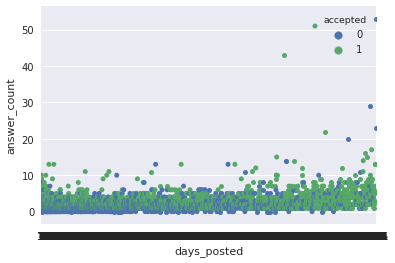

In [5]:
ax = sns.stripplot(x="days_posted", y="answer_count", hue="accepted", data=result)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


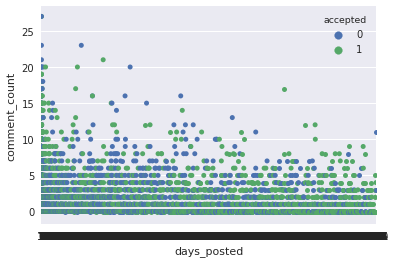

In [8]:
ax = sns.stripplot(x="days_posted", y="comment_count", hue="accepted", data=result)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


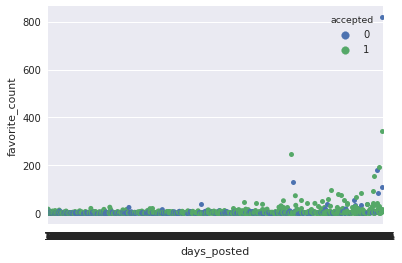

In [9]:
ax = sns.stripplot(x="days_posted", y="favorite_count", hue="accepted", data=result)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


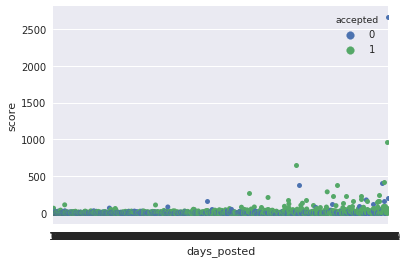

In [10]:
ax = sns.stripplot(x="days_posted", y="score", hue="accepted", data=result)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


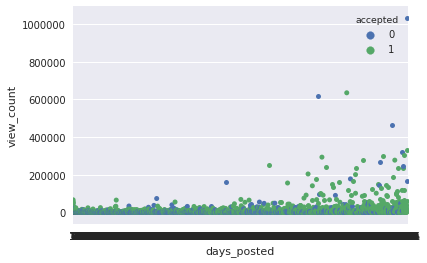

In [11]:
ax = sns.stripplot(x="days_posted", y="view_count", hue="accepted", data=result)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


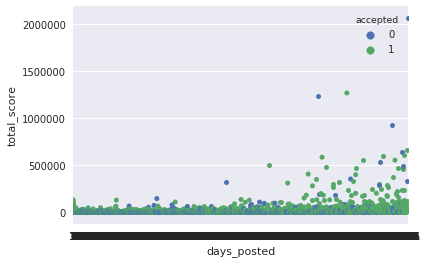

In [12]:
ax = sns.stripplot(x="days_posted", y="total_score", hue="accepted", data=result)

In [13]:
result.describe()

,id,accepted_answer_id,answer_count,comment_count,favorite_count,score,view_count,days_posted,accepted,total_score
count,1.722600e+04,8.999000e+03,17226.000000,17226.000000,3786.000000,17226.000000,1.722600e+04,17226.000000,17226.000000,1.722600e+04
mean,2.900290e+07,2.628447e+07,1.515616,1.960176,2.810090,2.071868,2.174922e+03,175.432660,0.522408,4.357525e+03
std,1.568496e+07,1.567545e+07,1.482639,2.612715,16.869226,24.498100,1.555546e+04,484.216191,0.499512,3.113709e+04
min,5.473000e+03,2.177800e+04,0.000000,0.000000,0.000000,-9.000000,4.000000e+00,0.000000,0.000000,8.000000e+00
25%,1.554868e+07,1.243713e+07,1.000000,0.000000,1.000000,0.000000,7.500000e+01,0.000000,0.000000,1.550000e+02
50%,2.960699e+07,2.569039e+07,1.000000,1.000000,1.000000,0.000000,2.720000e+02,0.000000,1.000000,5.485000e+02
75%,4.261056e+07,3.946695e+07,2.000000,3.000000,2.000000,1.000000,9.530000e+02,8.000000,1.000000,1.910000e+03
max,5.496497e+07,5.494473e+07,53.000000,27.000000,818.000000,2662.000000,1.032916e+06,3725.000000,1.000000,2.069429e+06


#  Sampling into train-dev-test sets with only required columns

In [56]:
def sample_between(a, b):
  basequery = """
  SELECT 
    answer_count, comment_count, favorite_count,  score, view_count,
    TIMESTAMP_DIFF(last_activity_date, creation_date, DAY) as days_posted,
    IF(accepted_answer_id IS NULL , 0, 1) as accepted,
    (IF(answer_count IS NULL , 0, answer_count*2) 
    + IF(comment_count IS NULL , 0, comment_count)  
    + IF(favorite_count IS NULL , 0, favorite_count)  
    + IF(score IS NULL , 0, score)  
    + IF(view_count IS NULL , 0, view_count*2) ) 
    as total_score
  FROM 
    `bigquery-public-data.stackoverflow.posts_questions`
  """
  sampler = "WHERE MOD(ABS(FARM_FINGERPRINT(CAST(id as STRING))), EVERY_N) = 1"
  sampler2 = "AND {0} >= {1}\n AND {0} < {2}".format(
           "MOD(ABS(FARM_FINGERPRINT(CAST(id AS STRING))), EVERY_N )",
           "(EVERY_N * {})".format(a*0.01), "(EVERY_N * {})".format(b*0.01)
          )
  return "{}\n{}\n{}".format(basequery, sampler, sampler2)


def create_query(phase, EVERY_N):
  """Phase: train (70%) valid (15%) or test (15%)"""
  query = ""
  if phase == 'train':
    query = sample_between(0,70)
  elif phase == 'valid':
    query = sample_between(70,85)
  else:
    query = sample_between(85,100)
  return query.replace("EVERY_N", str(EVERY_N))

print(create_query('train', 100))


  SELECT 
    answer_count, comment_count, favorite_count,  score, view_count,
    TIMESTAMP_DIFF(last_activity_date, creation_date, DAY) as days_posted,
    IF(accepted_answer_id IS NULL , 0, 1) as accepted,
    (IF(answer_count IS NULL , 0, answer_count*2) 
    + IF(comment_count IS NULL , 0, comment_count)  
    + IF(favorite_count IS NULL , 0, favorite_count)  
    + IF(score IS NULL , 0, score)  
    + IF(view_count IS NULL , 0, view_count*2) ) 
    as total_score
  FROM 
    `bigquery-public-data.stackoverflow.posts_questions`
  
WHERE MOD(ABS(FARM_FINGERPRINT(CAST(id as STRING))), 100) = 1
AND MOD(ABS(FARM_FINGERPRINT(CAST(id AS STRING))), 100 ) >= (100 * 0.0)
 AND MOD(ABS(FARM_FINGERPRINT(CAST(id AS STRING))), 100 ) < (100 * 0.7000000000000001)


In [58]:
query = create_query('valid', 100)
print(query)
dfv = bq.Query(query).execute().result().to_dataframe()
print(dfv)


  SELECT 
    answer_count, comment_count, favorite_count,  score, view_count,
    TIMESTAMP_DIFF(last_activity_date, creation_date, DAY) as days_posted,
    IF(accepted_answer_id IS NULL , 0, 1) as accepted,
    (IF(answer_count IS NULL , 0, answer_count*2) 
    + IF(comment_count IS NULL , 0, comment_count)  
    + IF(favorite_count IS NULL , 0, favorite_count)  
    + IF(score IS NULL , 0, score)  
    + IF(view_count IS NULL , 0, view_count*2) ) 
    as total_score
  FROM 
    `bigquery-public-data.stackoverflow.posts_questions`
  
WHERE MOD(ABS(FARM_FINGERPRINT(CAST(id as STRING))), 100) = 1
AND MOD(ABS(FARM_FINGERPRINT(CAST(id AS STRING))), 100 ) >= (100 * 0.7000000000000001)
 AND MOD(ABS(FARM_FINGERPRINT(CAST(id AS STRING))), 100 ) < (100 * 0.85)
Empty DataFrame
Columns: []
Index: []


In [ ]:
def sample_between(a, b):
  basequery = """
  SELECT 
     MOD(ABS(FARM_FINGERPRINT(CAST(id as STRING))), 100) ,answer_count
  FROM 
    `bigquery-public-data.stackoverflow.posts_questions`
  """
  sampler = "WHERE MOD(ABS(FARM_FINGERPRINT(CAST(id as STRING))), EVERY_N) = 1"
  
  return "{}".format(basequery)

query = create_query('valid', 100)    #dependent on above implementation of create_query
print(query)
dfv = bq.Query(query).execute().result().to_dataframe()
print(dfv)


  SELECT 
     MOD(ABS(FARM_FINGERPRINT(CAST(id as STRING))), 100) ,answer_count
  FROM 
    `bigquery-public-data.stackoverflow.posts_questions`
  


In [61]:
def to_csv(df, filename):
  outdf = df.copy(deep = False)
  outdf.loc[:, 'key'] = np.arange(0, len(outdf)) # rownumber as key
  # Reorder columns so that target is first column
  cols = outdf.columns.tolist()
  print(cols)
  cols.remove('accepted')
  cols.insert(0, 'accepted')
  print(cols)
  outdf = outdf[cols]
  print(outdf)
  outdf.to_csv(filename,  header = False, index_label = False, index = False)
  print("Wrote {} to {}".format(len(outdf), filename))

In [42]:
for phase in ['train', 'valid', 'test']:
  query = create_query(phase, 100)
  df = bq.Query(query).execute().result().to_dataframe()
  to_csv(df, 'stackoverflow-{}.csv'.format(phase))

['answer_count', 'comment_count', 'favorite_count', 'score', 'view_count', 'days_posted', 'accepted', 'total_score', 'key']
['accepted', 'answer_count', 'comment_count', 'favorite_count', 'score', 'view_count', 'days_posted', 'total_score', 'key']
        accepted  answer_count  comment_count  favorite_count  score  \
0              1             7              1             2.0     21   
1              1             7              0             1.0      4   
2              1             7              1             NaN      4   
3              1             8              2             NaN      3   
4              1            19              2             4.0     50   
5              1             7              5             1.0     15   
6              0             7              0             4.0      7   
7              1             7              0             4.0     17   
8              1             7              2             8.0     20   
9              1             9  

ValueError: list.remove(x): x not in list

In [ ]:
## Verify that datasets exist

In [ ]:
!ls -ltrh 